#Load initial data and create the merged data fIle

In [ ]:
import iofunctions as iof
import os
import pandas as pd

datafolder = "golgi-analysis-data"

# laod all Imaris CSV files
spinefiles = iof.list_files(datafolder,"csv")



#run accross all spines in the library and prepare 2 dataframes
#for spine records with no acquisition errors
MergedSpineData = pd.DataFrame()
#for spine records with acquisition errors, still useful for 2d density calculations
MergedSpineDataOdd = pd.DataFrame()

for spinefile in spinefiles:
    location = os.path.join(datafolder, spinefile)
    try:
        SingleSpineData = pd.read_csv(location, index_col=13)
        print("READ OK: "+spinefile)
        totalSpineMeasures = len(SingleSpineData[SingleSpineData.Variable == "Spine Length"])
        totalDendriteLength = SingleSpineData.loc[SingleSpineData["Variable"] == "Dendrite Length", "Value"].sum()
        
        # adding a column with 2D Spine Density
        SingleSpineData["2D Spine Density"] = 0.5*totalSpineMeasures/totalDendriteLength
        SingleSpineData["ImageName"] = spinefile
        # check that there are no problems with odd/even spine number
        if (totalSpineMeasures % 2 == 0):
            # merge all spinefiles in one
            MergedSpineData = pd.concat([MergedSpineData, SingleSpineData])
        else:
            # merge all Odd spinefiles in one, here we can pick only the spine density
            print("ERROR Odd: "+spinefile)
            MergedSpineDataOdd = pd.concat([MergedSpineDataOdd, SingleSpineData])
    except:
        print("ERROR Format CSV, corrected: "+spinefile)
        f = open(location,"r+")
        d = f.readlin
        es()
        print("Total lines before to remove Imaris-exported shit of the first 3 lines")
        print(len(d))
        f.seek(0)
        #remove Imaris-exported shit of the first 3 lines
        del d[0:3]
        
        for i in d:
            f.write(i)
        f.truncate()
        f.close()

## Prepare Merged Spines

In [2]:
SpineLengthMixed = MergedSpineData[MergedSpineData.Variable == "Spine Length"].reset_index()
SpineStraightMixed = MergedSpineData[MergedSpineData.Variable == "Spine Straightness"].reset_index()
# extracting data from SpineLengthMixed
SpineLength = SpineLengthMixed[SpineLengthMixed.index % 2 == 0].reset_index()
SpineWidth = SpineLengthMixed[SpineLengthMixed.index % 2 == 1].reset_index()
SpineStraightness = SpineStraightMixed[SpineStraightMixed.index % 2 == 0].reset_index()

totalSpines = len(SpineLength)
print("\n================\nTotal Spines: "+str(totalSpines))

SpineStraightness.head()


Total Spines: 4433


,level_0,index,2D Spine Density,Category,Channel,Collection,Depth,Distance,FilamentID,ID,...,Level,Radius,ReferenceFrame,Time,Type,Unit,Unnamed: 14,Unnamed: 15,Value,Variable
0,0,1.070000e+10,0.33023,Spine,NaN,NaN,0.0,NaN,100000001.0,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.999089,Spine Straightness
1,2,3.070000e+10,0.33023,Spine,NaN,NaN,0.0,NaN,100000003.0,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.983539,Spine Straightness
2,4,5.070000e+10,0.33023,Spine,NaN,NaN,0.0,NaN,100000005.0,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.997549,Spine Straightness
3,6,8.070000e+10,0.33023,Spine,NaN,NaN,0.0,NaN,100000008.0,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1.000000,Spine Straightness
4,8,1.107000e+11,0.33023,Spine,NaN,NaN,0.0,NaN,100000011.0,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.999726,Spine Straightness


## Prepare Merged Spines with Odd recording (for density only)

In [3]:
SpineLengthMixedOdd = MergedSpineDataOdd[MergedSpineDataOdd.Variable == "Spine Length"].reset_index()
SpineStraightMixedOdd = MergedSpineDataOdd[MergedSpineDataOdd.Variable == "Spine Straightness"].reset_index()
# extracting data from SpineLengthMixed
SpineLengthOdd = SpineLengthMixedOdd[SpineLengthMixedOdd.index % 2 == 0].reset_index()
SpineWidthOdd = SpineLengthMixedOdd[SpineLengthMixedOdd.index % 2 == 1].reset_index()
SpineStraightnessOdd = SpineStraightMixedOdd[SpineStraightMixedOdd.index % 2 == 0].reset_index()

totalSpines = len(SpineLengthOdd)
print("\n================\nTotal Spines: "+str(totalSpines))

SpineStraightnessOdd.head()


Total Spines: 4784


,index,ID,Variable,Value,Unit,Category,Channel,Collection,Depth,Distance,Level,Radius,Time,Type,FilamentID,Unnamed: 14,2D Spine Density,ImageName
0,0,700000000,Spine Straightness,0.994012,NaN,Spine,NaN,NaN,0.0,NaN,1.0,NaN,1,NaN,100000000.0,NaN,0.375631,2016-10-14_id9643_slide1_column1_slice2_100x-S...
1,2,10700000000,Spine Straightness,0.982858,NaN,Spine,NaN,NaN,0.0,NaN,NaN,NaN,1,NaN,100000001.0,NaN,0.375631,2016-10-14_id9643_slide1_column1_slice2_100x-S...
2,4,30700000000,Spine Straightness,0.995122,NaN,Spine,NaN,NaN,0.0,NaN,NaN,NaN,1,NaN,100000003.0,NaN,0.375631,2016-10-14_id9643_slide1_column1_slice2_100x-S...
3,6,50700000000,Spine Straightness,0.999743,NaN,Spine,NaN,NaN,0.0,NaN,NaN,NaN,1,NaN,100000005.0,NaN,0.375631,2016-10-14_id9643_slide1_column1_slice2_100x-S...
4,8,70700000000,Spine Straightness,0.996192,NaN,Spine,NaN,NaN,0.0,NaN,NaN,NaN,1,NaN,100000007.0,NaN,0.375631,2016-10-14_id9643_slide1_column1_slice2_100x-S...


## Prepare Metadata File

In [4]:
metadataFile = pd.read_excel("data/Golgi Acquisition DB 8_adopted.xlsx", sheetname="Sheet2")
metadataFile.tail()

,brainSlice,Image Name,dendriteType,pyramidalLayer,Genotype
292,2016-10-22_id9842_slide1_column1_slice3_100x-S...,2016-10-22_id9842_slide1_column1_slice3_100x-S...,apical,l5,WT
293,2016-10-22_id9842_slide1_column1_slice3_100x-S...,2016-10-22_id9842_slide1_column1_slice3_100x-S...,apical,l5,WT
294,2016-10-22_id9842_slide1_column1_slice3_100x-S...,2016-10-22_id9842_slide1_column1_slice3_100x-S...,apical,l5,WT
295,2016-10-22_id9842_slide1_column2_slice3_100x-S...,2016-10-22_id9842_slide1_column2_slice3_100x-S...,apical,l5,WT
296,2016-10-22_id9842_slide1_column2_slice3_100x-S...,2016-10-22_id9842_slide1_column2_slice3_100x-S...,basal,l5,WT


## Consolidate into separate files

### Consolidate Odd

In [102]:
mergedSpineDFOdd = pd.DataFrame()
mergedSpineDFOdd = pd.concat([SpineLengthOdd.Value, SpineWidthOdd.Value, SpineLengthOdd["2D Spine Density"], SpineStraightnessOdd.Value, SpineLengthOdd.ImageName], axis=1)
mergedSpineDFOdd.columns = ["Spine Length, um", "Head Width, um", "2D Spine Density 1/um", "Straightness", "Image Name"]

mergedSpineDFOdd.head()
mergedSpineDFOddMeta = pd.merge(mergedSpineDFOdd, metadataFile, how='left', on="Image Name")
mergedSpineDFOddMeta.to_excel('output/mergedSpineDFOddMeta.xlsx','Sheet1')

### Consolidate Normal

In [103]:
mergedSpineDF = pd.DataFrame()
mergedSpineDF = pd.concat([SpineLength.Value, SpineWidth.Value, SpineLength["2D Spine Density"], SpineStraightness.Value, SpineLength.ImageName], axis=1)
mergedSpineDF.columns = ["Spine Length, um", "Head Width, um", "2D Spine Density 1/um", "Straightness", "Image Name"]

mergedSpineDF.head()
mergedSpineDFMeta = pd.merge(mergedSpineDF, metadataFile, how='left', on="Image Name")
mergedSpineDFMeta.to_excel('output/mergedSpineDFMeta.xlsx','Sheet1')

## Merge All Data


In [105]:
mergedSpineDFOddMeta['oddType'] = "Odd"
mergedSpineDFOddMeta.to_excel('output/mergedSpineDFOddMetaType.xlsx','Sheet1')
mergedSpineDFMeta['oddType'] = "Normal"
mergedSpineDFMeta.to_excel('output/mergedSpineDFNormalMetaType.xlsx','Sheet1')

mergedSpineDFMetaComplete = mergedSpineDFMeta.append(mergedSpineDFOddMeta, ignore_index=True)
mergedSpineDFMetaComplete.to_excel('output/mergedSpineDFMetaComplete.xlsx','Sheet1')

###add mouseID information to the table

In [ ]:
#add mouseID information to the table
list_ID = ['9643', '9645', '9839', '9842', '9384', '9382', '9843', '9644']

mergedSpineDFMetaCompleteID = mergedSpineDFMetaComplete
mergedSpineDFMetaCompleteID['mouseID'] = mergedSpineDFMetaCompleteID['brainSlice'].apply(iof.returnID)

mergedSpineDFMetaCompleteID.to_excel('output/mergedSpineDFMetaCompleteID.xlsx','Sheet1')

In [89]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

print('CKO 2D Spine Density 1/um')
print(mergedSpineDFMeta[(mergedSpineDFMeta.Genotype=="CKO") & (mergedSpineDFMeta.dendriteType=="basal")]['2D Spine Density 1/um'].describe())
print('WT 2D Spine Density 1/um')
print(mergedSpineDFMeta[(mergedSpineDFMeta.Genotype=="WT") & (mergedSpineDFMeta.dendriteType=="basal")]['2D Spine Density 1/um'].describe())

CKO 2D Spine Density 1/um
count    654.000000
mean       0.338766
std        0.140495
min        0.067741
25%        0.244130
50%        0.323320
75%        0.361505
max        0.831316
Name: 2D Spine Density 1/um, dtype: float64
WT 2D Spine Density 1/um
count    1084.000000
mean        0.413709
std         0.168940
min         0.172748
25%         0.298674
50%         0.366679
75%         0.498018
max         0.954173
Name: 2D Spine Density 1/um, dtype: float64


Normal


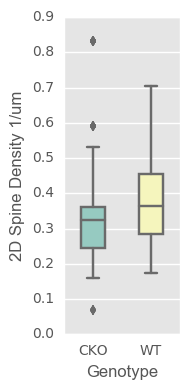

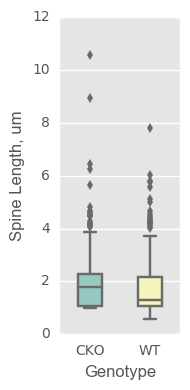

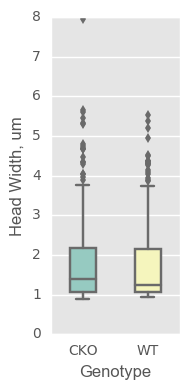

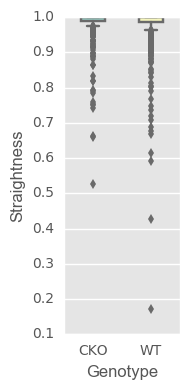

In [93]:
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

print('Normal')
mergedSpineDFMetaBasal = mergedSpineDFMeta[(mergedSpineDFMeta.dendriteType=="basal")&(mergedSpineDFMeta.pyramidalLayer=="l5")]
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="2D Spine Density 1/um", x="Genotype", data=mergedSpineDFMetaBasal, palette="Set3", width=0.4)
plt.savefig('basal-2D Spine Density.png')
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="Spine Length, um", x="Genotype", data=mergedSpineDFMetaBasal, palette="Set3", width=0.4)
plt.savefig('basal-Spine Length.png')
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="Head Width, um", x="Genotype", data=mergedSpineDFMetaBasal, palette="Set3", width=0.4)
plt.savefig('basal-Head Width.png')
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="Straightness", x="Genotype", data=mergedSpineDFMetaBasal, palette="Set3", width=0.4)
plt.savefig('basal-Straightness.png')

In [1]:
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

print('Normal')
mergedSpineDFMetaBasal = mergedSpineDFMeta[(mergedSpineDFMeta.dendriteType=="basal")&(mergedSpineDFMeta.pyramidalLayer=="l5")]
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(12, 6))

ax = sns.boxplot(y="2D Spine Density 1/um", x="Genotype", data=mergedSpineDFMetaBasal, palette="Set3", width=0.4, ax = axes[0,0])
ax = sns.boxplot(y="Spine Length, um", x="Genotype", data=mergedSpineDFMetaBasal, palette="Set3", width=0.4, ax = axes[0,1])
ax = sns.boxplot(y="Head Width, um", x="Genotype", data=mergedSpineDFMetaBasal, palette="Set3", width=0.4, ax = axes[0,2])
ax = sns.boxplot(y="Straightness", x="Genotype", data=mergedSpineDFMetaBasal, palette="Set3", width=0.4, ax = axes[0,3])

plt.savefig('basal-4.png')

Normal


NameError: name 'mergedSpineDFMeta' is not defined

Odd


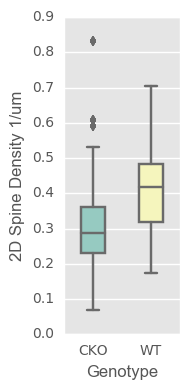

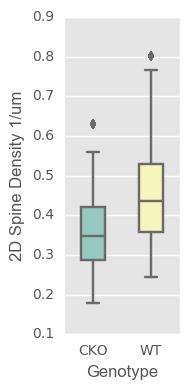

In [107]:
print('Odd')
mergedSpineDFMetaCompleteBasal = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="2D Spine Density 1/um", x="Genotype", data=mergedSpineDFMetaCompleteBasal, palette="Set3", width=0.4)
plt.savefig('basal-2D Spine DensityComplete.png')

mergedSpineDFMetaCompleteApical = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")]
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="2D Spine Density 1/um", x="Genotype", data=mergedSpineDFMetaCompleteApical, palette="Set3", width=0.4)
plt.savefig('apical-2D Spine DensityComplete.png')

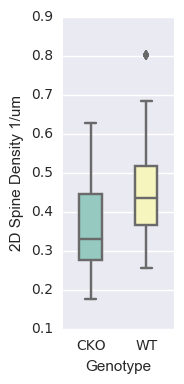

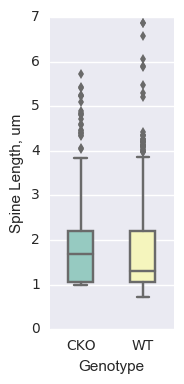

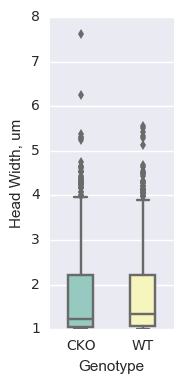

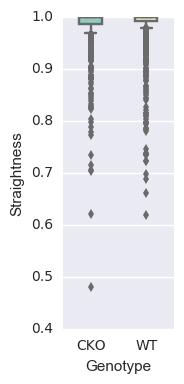

In [88]:
mergedSpineDFMetaApical = mergedSpineDFMeta[(mergedSpineDFMeta.dendriteType=="apical")&(mergedSpineDFMeta.pyramidalLayer=="l5")]
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="2D Spine Density 1/um", x="Genotype", data=mergedSpineDFMetaApical, palette="Set3", width=0.4)
plt.savefig('apical-2D Spine Density.png')
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="Spine Length, um", x="Genotype", data=mergedSpineDFMetaApical, palette="Set3", width=0.4)
plt.savefig('apical-Spine Length.png')
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="Head Width, um", x="Genotype", data=mergedSpineDFMetaApical, palette="Set3", width=0.4)
plt.savefig('apical-Head Width.png')
plt.figure(figsize=(2, 4))
ax = sns.boxplot(y="Straightness", x="Genotype", data=mergedSpineDFMetaApical, palette="Set3", width=0.4)
plt.savefig('apical-Straightness.png')